<a href="https://colab.research.google.com/github/anacarolcarrascoconsultorias-lab/social-media-analysis/blob/main/Clean_and_analyze_social_media_usage_data_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Task 1 - Installing and Importing necessary libraries

!pip install jupyter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random

print("Import done")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.7/76.7 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.7 MB/s eta 0:00:00
Import done


In [2]:
# Styling graphs
sns.set_style('whitegrid')

# seed
np.random.seed(42)
random.seed(42)

In [3]:
# Task 2 – Generate random data for the social media experiment

# Number of cells
n = 500

# List of possible categories
categories = ["Food", "Travel", "Fashion","Fitness", "Music", "Culture", "Family", "Health"]

# Dictionary with random data
data = {
    # 500 dates from 01/01/2021
    "Date": pd.date_range("2021-01-01", periods=n),

    # 500 random categories chosen from the list
    "Category": [random.choice(categories) for _ in range(n)],

    # 500 random likes between 0 and 10000
    "Likes": np.random.randint(0, 10001, size=n)
}

# Create df
df = pd.DataFrame(data)

# Check results
list(data.keys()), len(data["Date"]), len(data["Category"]), len(data["Likes"])

(['Date', 'Category', 'Likes'], 500, 500, 500)

In [4]:
# Task 3 – Load the data into a Pandas DataFrame and explore

# Check the lines
print(f"Number of lines: {len(df)}")

# Check the rows
print(" 🔹 Head of the DataFrame:")
print(df.head(), "\n")

Number of lines: 500
 🔹 Head of the DataFrame:
        Date Category  Likes
0 2021-01-01   Travel   7270
1 2021-01-02     Food    860
2 2021-01-03    Music   5390
3 2021-01-04  Fitness   5191
4 2021-01-05  Fitness   5734 



In [5]:
#  General df's info
print("🔹Info:")
print(df.info(), "\n")

🔹Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 11.8+ KB
None 



In [6]:
# Descriptive statistics (only numeric columns)
print("🔹Descriptive statistics:")
print(df.describe(), "\n")

🔹Descriptive statistics:
                      Date        Likes
count                  500   500.000000
mean   2021-09-07 12:00:00  5079.472000
min    2021-01-01 00:00:00     4.000000
25%    2021-05-05 18:00:00  2732.500000
50%    2021-09-07 12:00:00  5234.500000
75%    2022-01-10 06:00:00  7429.500000
max    2022-05-15 00:00:00  9998.000000
std                    NaN  2840.679867 



In [7]:
# Category count
print("🔹Category value count:")
print(df["Category"].value_counts(), "\n")

🔹Category value count:
Category
Fitness    78
Family     70
Travel     68
Music      62
Food       58
Fashion    57
Health     55
Culture    52
Name: count, dtype: int64 



In [8]:
# Task 4 – Clean the data

# Create a copy
df_clean = df.copy()

# Remove nulls
df_clean = df_clean.dropna()

# Remove duplicates
df_clean = df_clean.drop_duplicates()

# Convert Date column to datetime
df_clean["Date"] = pd.to_datetime(df["Date"])

# Convert Likes to int
df_clean["Likes"] = df_clean["Likes"].astype(int)

# Check result
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      500 non-null    datetime64[ns]
 1   Category  500 non-null    object        
 2   Likes     500 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 11.8+ KB


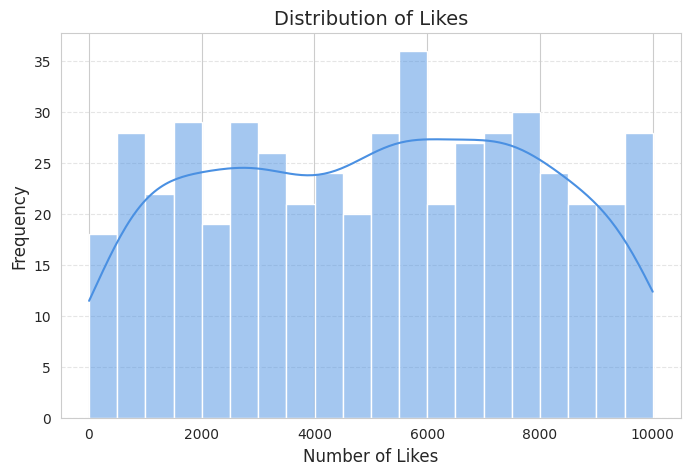

In [9]:
# Task 5 Graphs

# Likes - Histogram
plt.figure(figsize=(8,5))
sns.histplot(df_clean["Likes"], bins=20, kde=True, color="#4A90E2")

plt.title("Distribution of Likes", fontsize=14)
plt.xlabel("Number of Likes", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

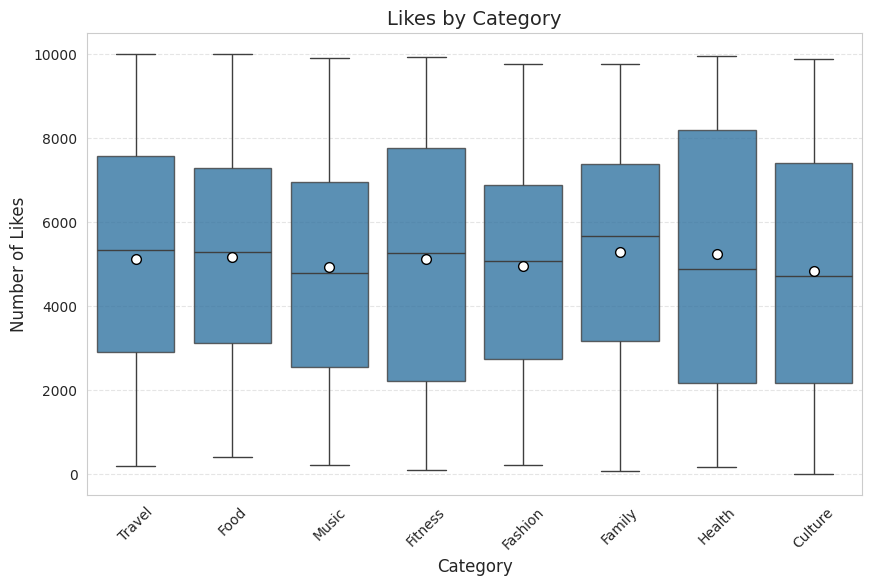

In [10]:
# Likes vs Category - Boxplot

plt.figure(figsize=(10,6))
sns.boxplot(
    data=df_clean,
    x="Category",
    y="Likes",
    showmeans=True,
    meanprops={
        "marker": "o",
        "markerfacecolor": "white",
        "markeredgecolor": "black",
        "markersize": 7
    },
    boxprops={"alpha":0.8}
)

plt.title("Likes by Category", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Number of Likes", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()



In [11]:
# General Average of Likes
overall_mean_likes = df_clean["Likes"].mean()
print(f"Overall Average of Likes: {overall_mean_likes}")

Overall Average of Likes: 5079.472


In [12]:
# Average of Likes by Category
mean_likes_by_category = df_clean.groupby("Category")["Likes"].mean()
print("Mean of Likes by Category:")
print(mean_likes_by_category.sort_values(ascending=False))

Mean of Likes by Category:
Category
Family     5277.957143
Health     5229.927273
Food       5159.586207
Travel     5105.985294
Fitness    5103.820513
Fashion    4939.350877
Music      4928.693548
Culture    4825.961538
Name: Likes, dtype: float64


**Conclusion**

This project aimed to simulate a social‐media performance dataset and apply a complete data analysis workflow, including data generation, exploration, cleaning, visualization, and statistical evaluation. The process began with importing the necessary Python libraries and generating 500 synthetic posts containing randomized dates, categories, and like counts. This ensured a controlled dataset that remained realistic enough to showcase analytical skills.

After loading the data into a Pandas DataFrame, an initial exploratory review was conducted using .head(), .info(), .describe(), and frequency counts for the categorical variable. This step confirmed that the dataset was structurally sound, balanced across categories, and contained no missing values. Even so, standard data‐cleaning operations such as removing duplicates and enforcing proper data types were applied to demonstrate good analytical practice.

Visualization played an essential role in identifying patterns and understanding the distribution of engagement.
The histogram revealed a broad and relatively uniform distribution of likes, indicating high variability and no single dominant range. The boxplot provided a comparative view across categories, showing similar distributions overall, with small differences in central tendency and spread. Although the dataset was artificially generated, the visualization process highlighted how such tools can be used to evaluate content performance in real scenarios.

Statistical analysis reinforced these findings. The overall mean of likes offered a general benchmark for engagement, while the category‐level mean values helped identify which topics might outperform others. These methods illustrate how companies can evaluate content strategy and allocate focus toward higher‐performing categories.

Overall, this project demonstrates proficiency in building and analyzing a dataset from end to end. It includes data generation, structured exploration, professional cleaning techniques, clear visual communication, and meaningful statistical interpretation. Together, these elements reflect a solid foundation in data analytics and readiness for practical applications in business environments.

Future Improvements

Although the project fulfills its objectives, several enhancements could further strengthen the analysis:

*   **Add more variables** such as comment count, share count, post length, or posting time to enable multidimensional engagement analysis.

*   **Introduce controlled noise or missing values** to simulate more realistic data challenges and demonstrate advanced cleaning strategies.

*   **Incorporate time‐series analysis**, such as weekly trends or seasonal engagement patterns.

*   **Implement automated reporting**, generating summary tables or visual dashboards with Plotly or Seaborn.

*   **Extend the dataset size**, allowing deeper statistical insights and more precise comparisons across categories.

These improvements would help transform the project from a structured exercise into a more comprehensive demonstration of real‐world analytical capability.